This notebook imports the data, prepares it for analysis (but not necessarily for modeling), and performs exploratory data analysis (EDA). The EDA begins with an overview of the dataset, then looks at the distribution of individual features, then compares features to the target, and ends by considering various combinations of features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


In [2]:
#import each dataset from GitHub
url = 'https://raw.githubusercontent.com/jamesdinardo/Retail-Forecasting/master/features_data.csv'
features = pd.read_csv(url)
print('Shape of features data: {}'.format(features.shape))
features.head()


Shape of features data: (8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
url = 'https://raw.githubusercontent.com/jamesdinardo/Retail-Forecasting/master/sales_data.csv'
sales = pd.read_csv(url)
print('Shape of sales data: {}'.format(sales.shape))
sales.head()

Shape of sales data: (421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [4]:
url = 'https://raw.githubusercontent.com/jamesdinardo/Retail-Forecasting/master/stores_data.csv'
stores = pd.read_csv(url)
print('Shape of stores data: {}'.format(stores.shape))
stores.head()

Shape of stores data: (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
#merge the three dataframes into one
df = pd.merge(features, sales, on=['Store', 'Date', 'IsHoliday'])
df = pd.merge(df, stores, on='Store')
print('Shape of final dataframe: {}'.format(df.shape))
df.head()


Shape of final dataframe: (421570, 16)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315


In [6]:
#get basic info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Date          421570 non-null  object 
 2   Temperature   421570 non-null  float64
 3   Fuel_Price    421570 non-null  float64
 4   MarkDown1     150681 non-null  float64
 5   MarkDown2     111248 non-null  float64
 6   MarkDown3     137091 non-null  float64
 7   MarkDown4     134967 non-null  float64
 8   MarkDown5     151432 non-null  float64
 9   CPI           421570 non-null  float64
 10  Unemployment  421570 non-null  float64
 11  IsHoliday     421570 non-null  bool   
 12  Dept          421570 non-null  int64  
 13  Weekly_Sales  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [7]:
#move the target column "Weekly_Sales" to the end
columns = list(df.columns.values)
order = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 13]
columns = [columns[i] for i in order]
print(columns)

df = df[columns]

['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Dept', 'Type', 'Size', 'Weekly_Sales']


In [8]:
#impute missing markdown values to 0
df = df.fillna(value={'MarkDown1':0, 'MarkDown2':0, 'MarkDown3':0, 'MarkDown4':0, 'MarkDown5':0})

In [9]:
#convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

#convert Store, Dept, and Type columns to category
df['Store'] = df['Store'].astype('category')

df['Dept'] = df['Dept'].astype('category')

df['Type'] = df['Type'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  category      
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     421570 non-null  float64       
 5   MarkDown2     421570 non-null  float64       
 6   MarkDown3     421570 non-null  float64       
 7   MarkDown4     421570 non-null  float64       
 8   MarkDown5     421570 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Dept          421570 non-null  category      
 13  Type          421570 non-null  category      
 14  Size          421570 non-null  int64         
 15  Weekly_Sales  421

In [10]:
#get overall summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,421570.0,2590.074819,6052.385934,0.000,0.000000,0.00000,2809.050000,88646.760000
MarkDown2,421570.0,879.974298,5084.538801,-265.760,0.000000,0.00000,2.200000,104519.540000
MarkDown3,421570.0,468.087665,5528.873453,-29.100,0.000000,0.00000,4.540000,141630.610000
MarkDown4,421570.0,1083.132268,3894.529945,0.000,0.000000,0.00000,425.290000,67474.850000
MarkDown5,421570.0,1662.772385,4207.629321,0.000,0.000000,0.00000,2168.040000,108519.280000
CPI,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
Unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000


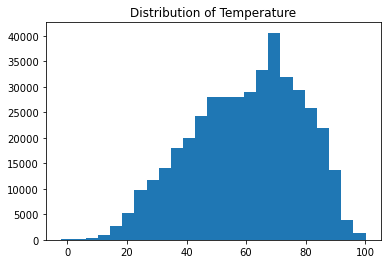

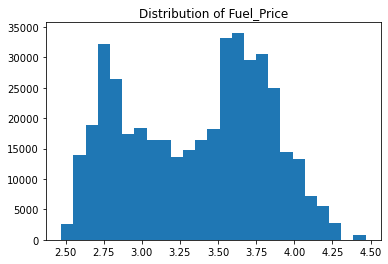

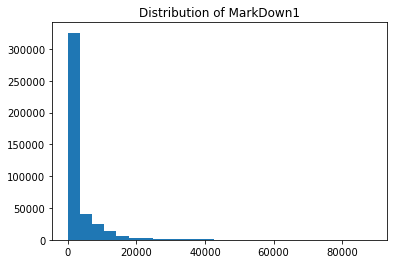

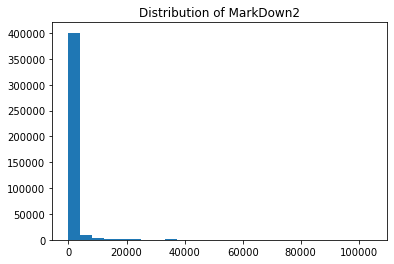

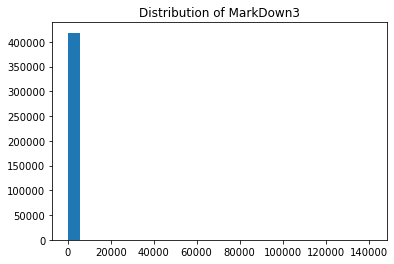

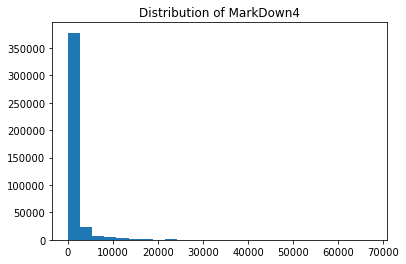

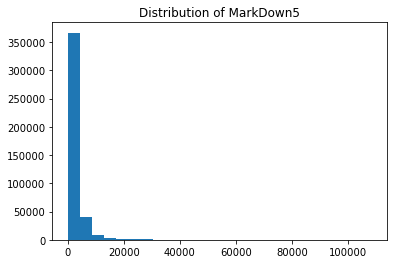

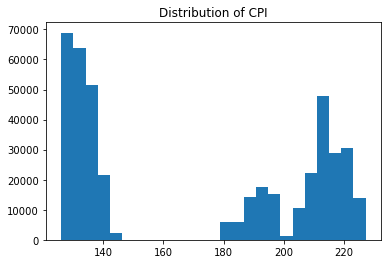

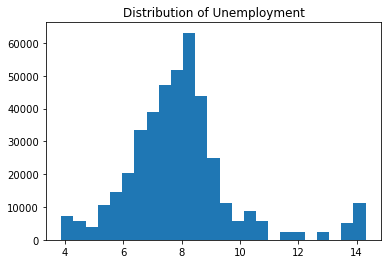

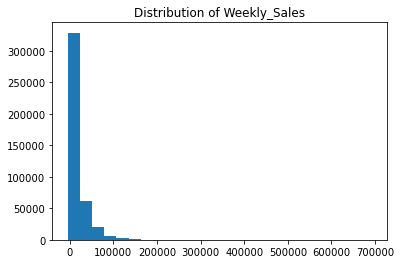

In [11]:
#plot histograms of the continuous variables
numeric_columns = [x for x in df.columns if df.dtypes[x] in ['float', 'int']]

for var in numeric_columns:
    fig, ax = plt.subplots()
    ax.hist(df[var], bins=25)
    ax.set_title(f'Distribution of {var}')

Text(0.5, 0, 'Total Sales in Millions')

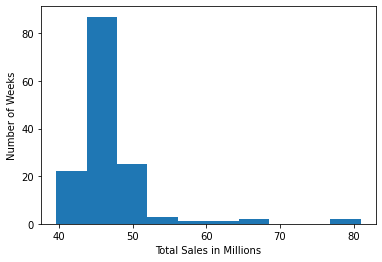

In [12]:
#histogram of total sales (across all stores and departments)
df.groupby('Date')['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='hist')
plt.ylabel('Number of Weeks')
plt.xticks(ticks=[40000000, 50000000, 60000000, 70000000, 80000000], labels=[40, 50, 60, 70, 80])
plt.xlabel('Total Sales in Millions')

In [36]:
#get total sales per week across all stores
total_sales_per_week = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
total_sales_per_week

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


In an average week, the total sales across all stores are 47113419.490279734


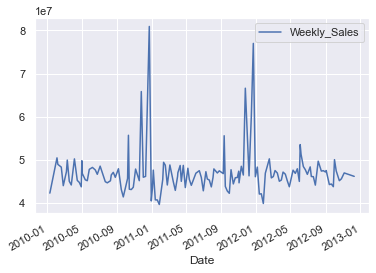

In [62]:
total_sales_per_week.plot(x='Date', y='Weekly_Sales')
print('In an average week, the total sales across all stores are {}'.format(total_sales_per_week['Weekly_Sales'].mean()))

In [120]:
#get average store sales per week
average_store_sales_per_week = df.groupby(['Date', 'Store'])['Weekly_Sales'].sum().reset_index()
average_store_sales_per_week.head(10)

,Date,Store,Weekly_Sales
0,2010-01-10,1,1453329.50
1,2010-01-10,2,1827440.43
2,2010-01-10,3,358784.10
3,2010-01-10,4,1842821.02
4,2010-01-10,5,283178.12
5,2010-01-10,6,1328468.89
6,2010-01-10,7,448998.73
7,2010-01-10,8,804105.49
8,2010-01-10,9,495692.19
9,2010-01-10,10,1645892.97


The average store does 1046964.8775617706 in sales per week


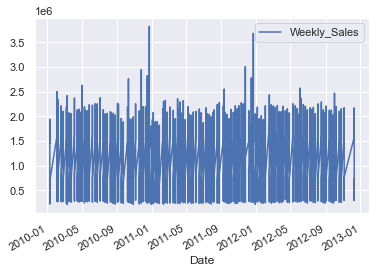

In [72]:
average_store_sales_per_week.plot(x='Date', y='Weekly_Sales')
print('The average store does {} in sales per week'.format(average_store_sales_per_week['Weekly_Sales'].mean()))

In [115]:
#compare the min, median, and max store
grouped_by_store = df.groupby('Store')['Weekly_Sales'].mean()

for idx, sales in grouped_by_store.iteritems():
    if sales == grouped_by_store.min():
        print(idx, sales)
    elif sales==grouped_by_store.max():
        print(idx, sales)
    elif sales==grouped_by_store.median():
        print(idx, sales)

5 5053.415812868089
20 29508.30159193265
35 13803.596985726323


In [126]:
min_max_median_store = df[df['Store'].isin([5, 20, 45])].groupby(['Date', 'Store'])['Weekly_Sales'].sum().dropna().reset_index()
min_max_median_store

,Date,Store,Weekly_Sales
0,2010-01-10,5,283178.12
1,2010-01-10,20,1933719.21
2,2010-01-10,45,690007.76
3,2010-02-04,5,331406.00
4,2010-02-04,20,2405395.22
...,...,...,...
424,2012-11-05,20,2168097.11
425,2012-11-05,45,770487.37
426,2012-12-10,5,325345.41
427,2012-12-10,20,2162951.36


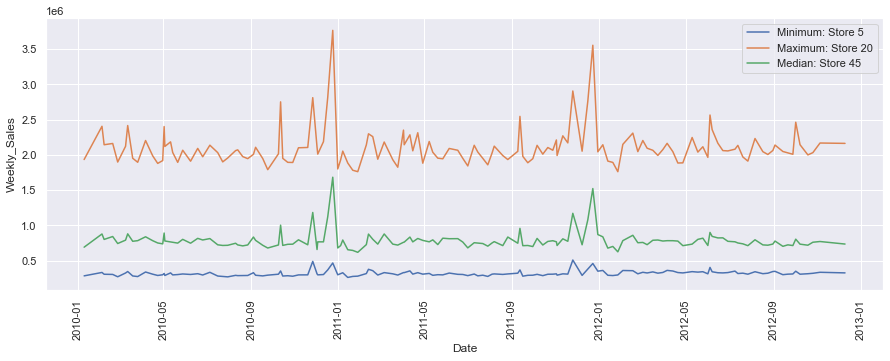

In [135]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = sns.lineplot(x='Date', y='Weekly_Sales', hue='Store', data=min_max_median_store)
_ = plt.xticks(rotation='90')
_ = plt.legend(['Minimum: Store 5', 'Maximum: Store 20', 'Median: Store 45'])

Date
2010-01-10    14391.780535
2010-02-04    17098.620298
2010-02-07    16769.792424
2010-02-19    16216.658979
2010-02-26    14899.549688
Name: Weekly_Sales, dtype: float64


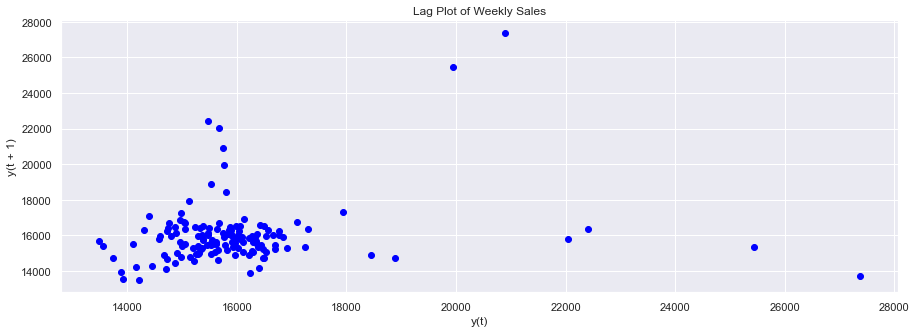

In [158]:
#create a time series lag scatter plot
time_series = df_indexed.groupby(df_indexed.index)['Weekly_Sales'].mean()
print(time_series.head())

from pandas.plotting import lag_plot

fig, ax = plt.subplots(figsize=(15, 5))
_ = lag_plot(time_series, lag=1, ax=ax, c='blue')
_ = ax.set_title('Lag Plot of Weekly Sales')

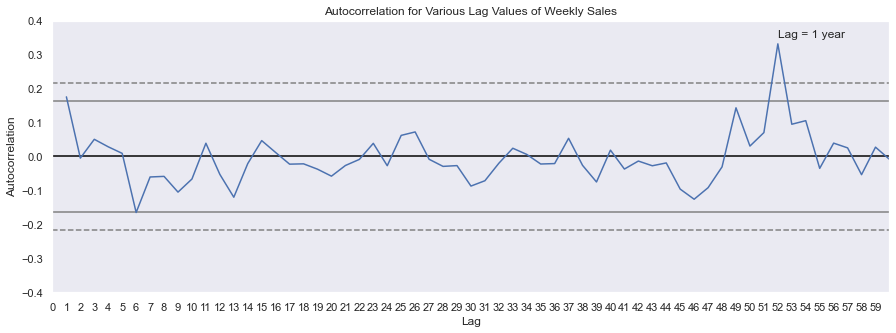

In [195]:
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize=(15, 5))
autocorrelation_plot(time_series, ax=ax)
_ = plt.xlim(0, 60)
_ = plt.ylim(-.4, .4)
_ = plt.xticks(range(0, 60, 1))
_ = plt.title('Autocorrelation for Various Lag Values of Weekly Sales')
_ = plt.annotate('Lag = 1 year', xy=(52, .35))

The peak correlation occurs between the value of Weekly Sales at t, and its value at t-52 (i.e. the same week last year).
There is also some correlation between t and t-1 and negative correlation between t and t-6.

In [16]:
#get frequency counts for the categorical variables

#get the number of rows for each store
df['Store'].value_counts().sort_values(ascending=False).rename('Number of Rows For Each Store')

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: Number of Rows For Each Store, dtype: int64

In [17]:
#get the number of rows for each department
df['Dept'].value_counts().sort_values(ascending=False).rename('Number of Rows for Each Department')

1     6435
82    6435
40    6435
2     6435
95    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Number of Rows for Each Department, Length: 81, dtype: int64

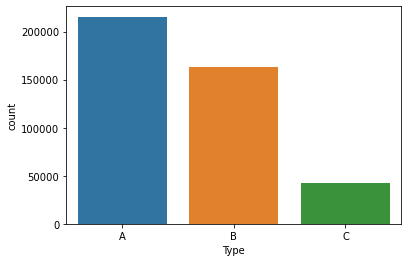

In [18]:
#plot the number of rows for each tyoe
sns.countplot(x='Type', data=df)

In [19]:
#get the range of the dates
print('Earliest date: {}'.format(df['Date'].min()))
print('Latest date: {}'.format(df['Date'].max()))

delta = df['Date'].max() - df['Date'].min()
print('Range: {}'.format(delta))

Earliest date: 2010-01-10 00:00:00
Latest date: 2012-12-10 00:00:00
Range: 1065 days 00:00:00


In [20]:
#calculate the total sales and sales each year
print('Total sales: {}'.format(df['Weekly_Sales'].sum()))
display(df.groupby(df.Date.dt.year).agg({'Weekly_Sales':'sum'}))

Total sales: 6737218987.11


,Weekly_Sales
Date,
2010,2.288886e+09
2011,2.448200e+09
2012,2.000133e+09


In [21]:
#calculate the average weekly sales each year
display(df.groupby(df.Date.dt.year).agg({'Weekly_Sales':'mean'}))

,Weekly_Sales
Date,
2010,16270.275737
2011,15954.070675
2012,15694.948597


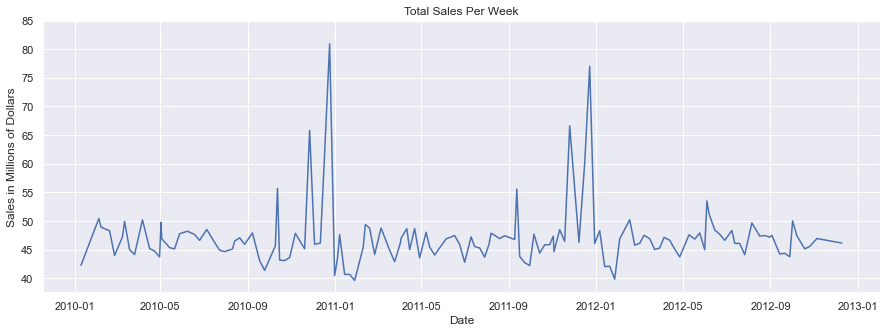

In [22]:
#plot the weekly sales

sales_per_week = df.groupby(df.Date).agg({'Weekly_Sales':'sum'})

sns.set()
fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.plot(sales_per_week.index, sales_per_week['Weekly_Sales'] / (10**6))
_ = ax.set_title('Total Sales Per Week')
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Sales in Millions of Dollars')
_ = ax.set_yticks(np.arange(40.0, 90.0, 5.0))

In [23]:
df_indexed = df.set_index('Date')
df_indexed.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Type,Size,Weekly_Sales
Date,,,,,,,,,,,,,,,
2010-05-02,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,A,151315,24924.50
2010-05-02,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,A,151315,50605.27
2010-05-02,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,A,151315,13740.12
2010-05-02,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,A,151315,39954.04
2010-05-02,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,A,151315,32229.38


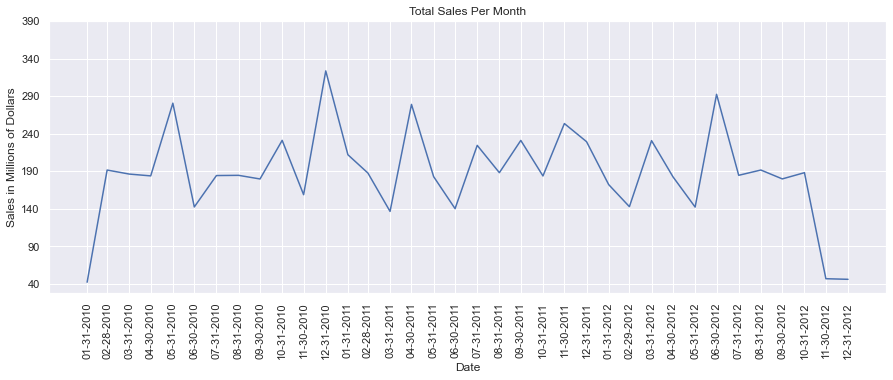

In [24]:
sales_per_month = df_indexed.resample('M')['Weekly_Sales'].sum()

fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.plot(sales_per_month / (10**6))
_ = ax.set_title('Total Sales Per Month')
_ = ax.set_xticks(list(sales_per_month.index))
_ = ax.set_xticklabels(sales_per_month.index.strftime('%m-%d-%Y'), rotation=90)
_ = ax.set_xlabel('Date')
_ = ax.set_ylabel('Sales in Millions of Dollars')
_ = ax.set_yticks(np.arange(40.0, 400.0, 50.0))

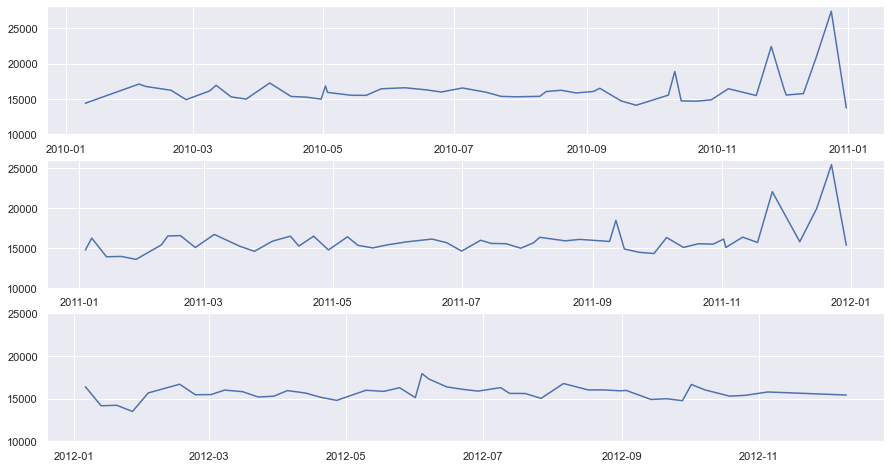

In [25]:
#plot weekly sales for each year
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 8))
_ = ax[0].plot(df_indexed['2010'].groupby('Date')['Weekly_Sales'].mean())
_ = ax[1].plot(df_indexed['2011'].groupby('Date')['Weekly_Sales'].mean())
_ = ax[2].plot(df_indexed['2012'].groupby('Date')['Weekly_Sales'].mean())

_ = ax[0].set_yticks([10000, 15000, 20000, 25000])
_ = ax[1].set_yticks([10000, 15000, 20000, 25000])
_ = ax[2].set_yticks([10000, 15000, 20000, 25000])

In [26]:
df_indexed['2010'].groupby('Date')['Weekly_Sales'].mean()

Date
2010-01-10    14391.780535
2010-02-04    17098.620298
2010-02-07    16769.792424
2010-02-19    16216.658979
2010-02-26    14899.549688
2010-03-09    16129.274645
2010-03-12    16924.051502
2010-03-19    15286.773578
2010-03-26    14975.894486
2010-04-06    17246.922034
2010-04-16    15347.713003
2010-04-23    15252.114749
2010-04-30    14967.509147
2010-05-02    16836.121997
2010-05-03    15921.015727
2010-05-11    15625.249792
2010-05-14    15513.374470
2010-05-21    15499.865359
2010-05-28    16428.449453
2010-06-08    16576.684704
2010-06-18    16281.041446
2010-06-25    15978.414909
2010-07-05    16542.716071
2010-07-16    15940.675484
2010-07-23    15357.115672
2010-07-30    15300.090305
2010-08-10    15362.048443
2010-08-13    16044.343374
2010-08-20    16222.320896
2010-08-27    15841.870407
2010-09-04    16050.589780
2010-09-07    16500.010117
2010-09-17    14708.339539
2010-09-24    14105.905324
2010-10-09    15537.758883
2010-10-12    18882.893619
2010-10-15    14726.782

In [209]:
#what months had the highest average weekly sales 
df_indexed.groupby(df_indexed.index.strftime('%B'))['Weekly_Sales'].mean().sort_values(ascending=False).reset_index().rename(columns={'Date':'Month', 'Weekly_Sales':'Average Weekly Sales'})

,Month,Average Weekly Sales
0,December,18342.245834
1,November,17271.744814
2,June,16258.141930
3,February,16026.823127
4,August,16012.023938
5,May,15850.122787
6,October,15728.044488
7,April,15638.149799
8,March,15631.676728
9,July,15563.149206


December had the highest average weekly sales. Average weekly sales are used since each month does not contain the same representation (number of weeks) in the dataset.

In [207]:
#what weeks had the highest sales
df_indexed.groupby(df_indexed.index)['Weekly_Sales'].sum().sort_values(ascending=False).reset_index().rename(columns={'Date':'Week', 'Weekly_Sales':'Total Sales'})

,Week,Total Sales
0,2010-12-24,80931415.60
1,2011-12-23,76998241.31
2,2011-11-25,66593605.26
3,2010-11-26,65821003.24
4,2010-12-17,61820799.85
...,...,...
138,2011-01-14,40673678.04
139,2011-01-21,40654648.03
140,2010-12-31,40432519.00
141,2012-01-27,39834974.67


Weeks that contain holidays such as Christmas and Thanksgiving (followed by black friday) are in the top 5, while the 5 lowest weeks occur in the month after Christmas. We can explore this further using the IsHoliday column:

In [210]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64

Roughly 1,000 more units are sold on holiday weeks on average than on non-holiday weeks

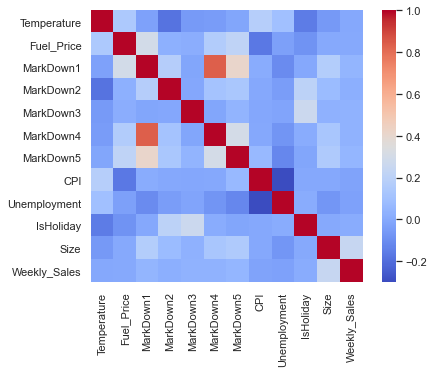

In [211]:
#plot a heatmap of correlations between each variable
fix, ax = plt.subplots(figsize=(7, 5))
_ = sns.heatmap(df.corr(), square=True, cmap='coolwarm', ax=ax)

In [212]:
#check if any variables have a linear correlation to Weekly_Sales
df.corr()['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.243828
MarkDown5       0.050465
MarkDown1       0.047172
MarkDown3       0.038562
MarkDown4       0.037467
MarkDown2       0.020716
IsHoliday       0.012774
Fuel_Price     -0.000120
Temperature    -0.002312
CPI            -0.020921
Unemployment   -0.025864
Name: Weekly_Sales, dtype: float64

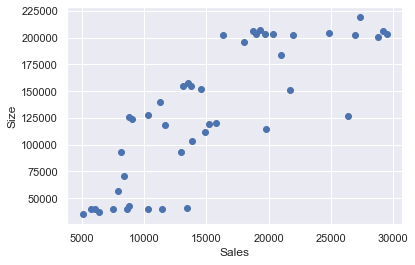

In [215]:
#do larger stores sell more units?
store_and_size = df.groupby('Store')[['Weekly_Sales', 'Size']].mean()
store_and_size = store_and_size.reset_index()
_ = plt.scatter(store_and_size['Weekly_Sales'], store_and_size['Size'])
_ = plt.xlabel('Sales')
_ = plt.ylabel('Size')

In [216]:
df['Size_Category'] = pd.cut(df['Size'], bins=[0, 100000, 200000, np.inf], labels=['Small', 'Medium', 'Large'])
df.groupby('Size_Category')['Weekly_Sales'].mean()

Size_Category
Small      8580.993002
Medium    15228.648344
Large     23231.406678
Name: Weekly_Sales, dtype: float64

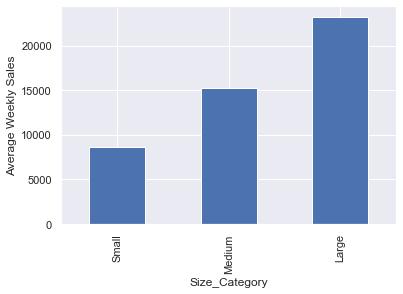

In [218]:
df.groupby('Size_Category')['Weekly_Sales'].mean().plot(kind='bar')
_ = plt.ylabel('Average Weekly Sales')

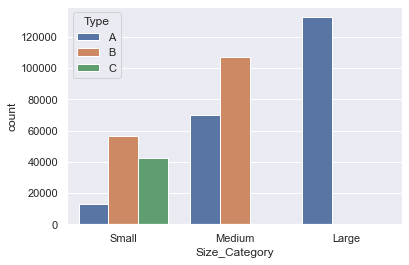

In [220]:
#is there a correlation between store size and type?
_ = sns.countplot(x='Size_Category', hue='Type', data=df)

In [245]:
#Which departments had the highest weekly sales on average
df.groupby('Dept').agg({'Weekly_Sales':'mean'}).sort_values(by='Weekly_Sales', ascending=False)

,Weekly_Sales
Dept,
92,75204.870531
95,69824.423080
38,61090.619568
72,50566.515417
65,45441.706224
...,...
51,21.931729
39,11.123750
78,7.296638


In [221]:
#combine stores and departments into a single variable
df['Store_Dept'] = df['Store'].astype('str') + '-' + df['Dept'].astype('str')

In [254]:
#which store departments had the highest average weekly sales
df.groupby('Store_Dept').agg({'Weekly_Sales':'mean', 'Store_Dept':'count'}).sort_values(by='Weekly_Sales', ascending=False).rename(columns={'Store_Dept':'Count'})

,Weekly_Sales,Count
Store_Dept,,
14-92,182527.956014,143
2-92,164840.230979,143
20-92,164633.741538,143
13-92,162034.099301,143
4-92,159365.107902,143
...,...,...
10-47,-64.694444,36
34-47,-78.919167,12
45-47,-88.420000,12


It looks like some departments lost money and have a lower count. Let's look at Store 1, Department 47:

In [231]:
df[df['Store_Dept']=='1-47'][['Date', 'Store_Dept', 'Weekly_Sales']].sort_values(by='Date')

,Date,Store_Dept,Weekly_Sales
188,2010-02-19,1-47,-863.0
43,2010-05-02,1-47,70.0
2549,2010-08-10,1-47,-58.0
695,2010-09-04,1-47,14.0
2695,2010-10-22,1-47,60.0
406,2010-12-03,1-47,-698.0
2912,2010-12-11,1-47,20.0
3342,2010-12-24,1-47,89.0
5620,2011-05-08,1-47,198.0
4419,2011-08-04,1-47,-298.0
